# with this Python code, I estimate Itausa's share price by applying MonteCarlo Simulation. Data with historical prices was downloaded from yahoofinance.com.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [8]:
data = pd.read_csv('ITSA4.csv', index_col='Date')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 6/22/15 to 6/19/20
Data columns (total 1 columns):
Adj Close    1241 non-null float64
dtypes: float64(1)
memory usage: 19.4+ KB


In [10]:
data.head()

,Adj Close
Date,
6/22/15,5.233504
6/23/15,5.233504
6/24/15,5.221835
6/25/15,5.134320
6/26/15,5.245173


In [11]:
data.tail()

,Adj Close
Date,
6/15/20,9.56
6/16/20,9.76
6/17/20,9.93
6/18/20,10.25
6/19/20,10.41


In [12]:
s_rets_1 = data.pct_change()
s_rets_1 * 100

,Adj Close
Date,
6/22/15,NaN
6/23/15,0.000000
6/24/15,-0.222967
6/25/15,-1.675943
6/26/15,2.159059
...,...
6/15/20,-2.349336
6/16/20,2.092050
6/17/20,1.741803


In [13]:
log_rets_1 = np.log(1 + data.pct_change())
log_rets_1.tail()

,Adj Close
Date,
6/15/20,-0.023774
6/16/20,0.020705
6/17/20,0.017268
6/18/20,0.031717
6/19/20,0.015489


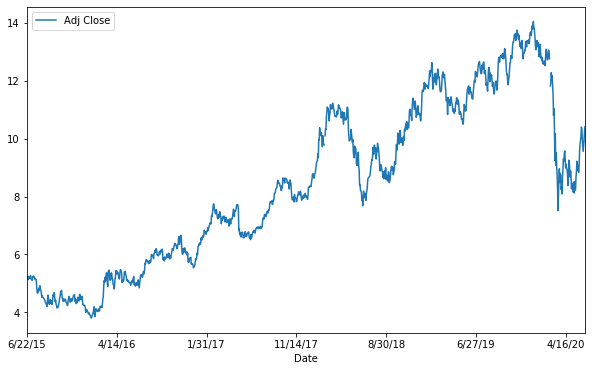

In [14]:
data.plot(figsize=(10,6));

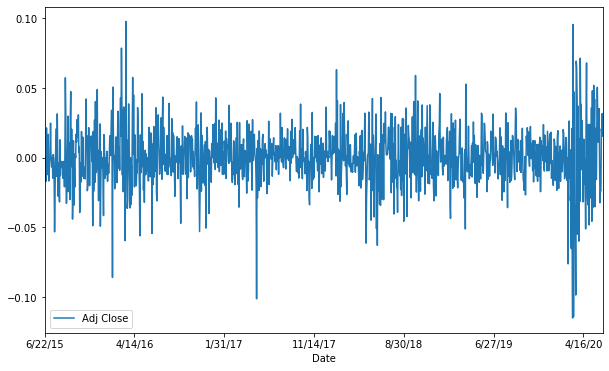

In [15]:
log_rets_1.plot(figsize=(10, 6))

# on the next lines of code I estimate the drift (the formula is drift = u - 1/2 * var.

In [16]:
u = log_rets_1.mean()
u

Adj Close    0.000553
dtype: float64

In [17]:
var = log_rets_1.var()
var

Adj Close    0.000426
dtype: float64

In [18]:
drift = u - (0.5 * var)
drift

Adj Close    0.00034
dtype: float64

In [19]:
stdev = log_rets_1.std()
stdev

Adj Close    0.020646
dtype: float64

In [20]:
np.array(drift)

array([0.00034012])

In [21]:
drift.values

array([0.00034012])

In [22]:
stdev.values

array([0.02064597])

In [23]:
norm.ppf(0.95)

1.6448536269514722

In [24]:
x = np.random.rand(10,2)
x

array([[0.90775541, 0.12444454],
       [0.34550552, 0.90452692],
       [0.37713098, 0.41430865],
       [0.83374343, 0.00933468],
       [0.17702628, 0.08916538],
       [0.46656811, 0.84143165],
       [0.14125252, 0.7317375 ],
       [0.41630284, 0.62120317],
       [0.50804202, 0.51743743],
       [0.95688356, 0.15022426]])

In [25]:
norm.ppf(x)

array([[ 1.32705893, -1.1530519 ],
       [-0.39748337,  1.30778524],
       [-0.31302462, -0.21647526],
       [ 0.96906425, -2.35206792],
       [-0.92675732, -1.34591246],
       [-0.08389964,  1.00035919],
       [-1.07470897,  0.61807638],
       [-0.21136088,  0.30864227],
       [ 0.02015972,  0.04372307],
       [ 1.71561307, -1.03547204]])

In [26]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.44644653,  0.7422637 ],
       [ 2.11739191, -0.05925285],
       [ 0.17999337, -2.73408448],
       [ 0.10585499,  1.36245893],
       [-0.76559888,  0.1308529 ],
       [ 0.27832173,  0.97428983],
       [ 0.61460347,  0.85560635],
       [-0.5782159 ,  0.69759509],
       [-1.33843226, -0.09151379],
       [ 0.29174567,  2.2283192 ]])

In [27]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [28]:
daily_returns

array([[1.00502203, 0.96780474, 1.0061814 , ..., 1.01516369, 0.99083191,
        1.01370185],
       [0.98826698, 0.98620046, 1.01078586, ..., 1.02235566, 0.99869712,
        1.02617069],
       [0.991485  , 0.9884831 , 0.95369133, ..., 0.9920431 , 1.00363846,
        1.0045414 ],
       ...,
       [0.95357736, 1.0121199 , 0.96271494, ..., 1.03378638, 1.00222675,
        0.99135765],
       [1.02434611, 1.01644197, 0.98716406, ..., 1.02163086, 1.00301436,
        1.02578147],
       [1.04693215, 1.00304663, 1.02417073, ..., 1.00261697, 0.96863562,
        0.98275008]])

In [30]:
S0 = data.iloc[-1]
S0

Adj Close    10.41
Name: 6/19/20, dtype: float64

In [31]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
price_list[0] = S0
price_list

array([[10.41, 10.41, 10.41, ..., 10.41, 10.41, 10.41],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [34]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [35]:
price_list

array([[10.41      , 10.41      , 10.41      , ..., 10.41      ,
        10.41      , 10.41      ],
       [10.28785926, 10.26634676, 10.52228084, ..., 10.64272241,
        10.39643699, 10.68243688],
       [10.20025818, 10.1481103 , 10.03500805, ..., 10.55803937,
        10.43426405, 10.73095014],
       ...,
       [27.65141804,  4.48655027, 17.95553854, ...,  8.14702186,
         8.28520674, 16.4873163 ],
       [28.32462242,  4.56031798, 17.72506224, ...,  8.32324899,
         8.31018135, 16.91238352],
       [29.65395793,  4.57421157, 18.15348989, ...,  8.34503069,
         8.04953763, 16.62064618]])

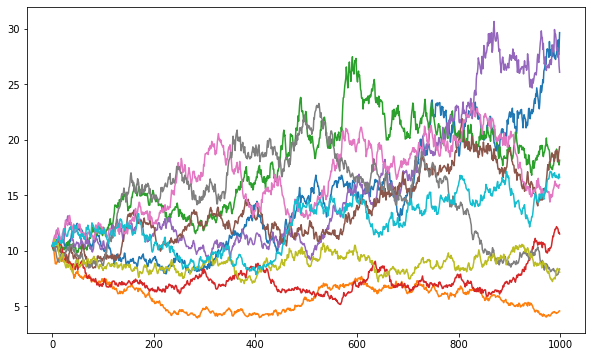

In [36]:
plt.figure(figsize=(10,6))
plt.plot(price_list)